# Portfolio assignment week 5

## 1. SVC

The Scikit-learn library provides different kernels for the Support Vector Classifier, e.g. `RBF` or `polynomial`.

Based on the examples [in the accompanying notebook](../Exercises/E_LR_SVM.ipynb), create your own `SVC` class and configure it with different kernels to see if you are able to have it correctly separate the moon-dataset. You can also use a `precomputed` kernel. In addition, there are several parameters you can tune to for better results. Make sure to go through [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

**Hint**:

- Plot the support vectors for understanding how it works.
- Give arguments why a certain kernel behaves a certain way.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


class CustomSVC:
    def __init__(self, kernel='linear', C=1.0, gamma='scale'):
        allowed_kernels = ['linear', 'rbf','poly','sigmoid']
        if kernel not in allowed_kernels:
            raise ValueError(f"Invalid kernel '{kernel}'. Allowed kernels are: {allowed_kernels}")
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.support_vectors_ = None
        self.model = None

    def fit(self, X, y):
        self.model = SVC(kernel=self.kernel, C=self.C, gamma=self.gamma)
        self.model.fit(X, y)
        self.support_vectors_ = self.model.support_vectors_

    def predict(self, X):
        return self.model.predict(X)



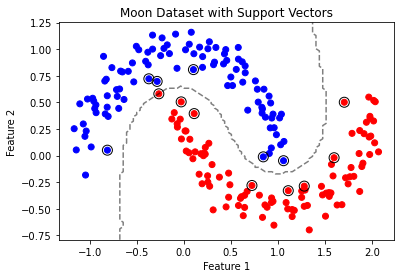

In [4]:

# moon dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=0,shuffle=True)

# Create custom SVC object with RBF kernel
custom_svc = CustomSVC(kernel='rbf', C=10, gamma=1.0)

# Fit the custom SVC to the dataset
custom_svc.fit(X, y)

# Predict labels for all points in the dataset
y_pred = custom_svc.predict(X)

# Plot the decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.scatter(custom_svc.support_vectors_[:, 0], custom_svc.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Moon Dataset with Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = custom_svc.predict(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()


In [7]:
from sklearn.metrics import accuracy_score

# Generate moon dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=0, shuffle=True)

# Create custom SVC objects with different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
models = []
accuracy_scores = []

for kernel in kernels:
    custom_svc = CustomSVC(kernel=kernel, C=10, gamma=1.0)
    custom_svc.fit(X, y)
    y_pred = custom_svc.predict(X)
    models.append(custom_svc)
    accuracy = accuracy_score(y, y_pred)
    accuracy_scores.append(accuracy)

# Compare accuracy scores
for i in range(len(kernels)):
    print(f"Kernel: {kernels[i]}, Accuracy: {accuracy_scores[i]}")


Kernel: linear, Accuracy: 0.875
Kernel: rbf, Accuracy: 0.995
Kernel: poly, Accuracy: 0.925
Kernel: sigmoid, Accuracy: 0.62


Out of the mentioned kernels, the Gaussian RBF kernel stands out as the most precise predictor with the finest data fit. The accuracy of the model using the Gaussian RBF kernel reaches 0.995.

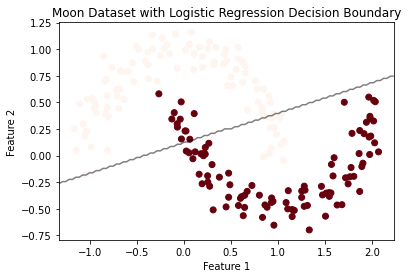

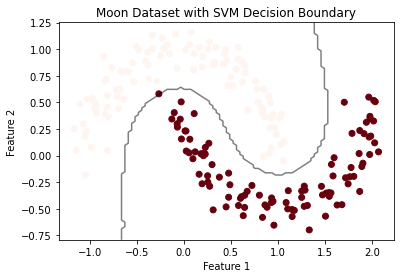

In [11]:
# Fit logistic regression to the dataset
lr_model = LogisticRegression()
lr_model.fit(X, y)

# Plot the decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Reds')
plt.title("Moon Dataset with Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = lr_model.predict(xy).reshape(XX.shape)

# Plot decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

svm_model = SVC(kernel='rbf', C=10, gamma=1.0)
svm_model.fit(X, y)

# Plot the decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Reds')
plt.title("Moon Dataset with SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.predict(xy).reshape(XX.shape)

# Plot decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()


## 2. Model Evaluation

Classification metrics are important for measuring the performance of your model. Scikit-learn provides several options such as the `classification_report` and `confusion_matrix` functions. Another helpful option is the `AUC ROC` and `precision-recall curve`. Try to understand what these metrics mean and give arguments why one metric would be more important then others.

For instance, if you have to predict whether a patient has cancer or not, the number of false negatives is probably more important than the number of false positives. This would be different if we were predicting whether a picture contains a cat or a dog – or not: it all depends on the context. Thus, it is important to understand when to use which metric.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the [breast cancer dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) which you can find on assemblix2019 (`/data/datasets/DS3/`). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. **Evaluation**

Create and train several `LogisticRegression` and `SVM` models with different values for their hyperparameters. Make use of the model evaluation techniques that have been described during the plenary part to determine the best model for this dataset. Accompany you elaborations with a conclusion, in which you explicitely interpret these evaluation and describe why the different metrics you are using are important or not. Make sure you take the context of this dataset into account.

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [14]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
print(df.shape)
print(df.info(),"\n",75*"_")
print(df.describe(),"\n",75*"_")
print("nulls : ",df.isnull().sum().sum())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

In [16]:
df.drop("id",axis=1,inplace=True)

In [17]:
df.groupby("diagnosis")["diagnosis"].count()

diagnosis
B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [19]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [20]:
def skew_value():
    c=[]
    for a,b in zip(df.skew(),df.skew().index.tolist()):
        if a>1 : 
            c.append(b)
    return c
skewed = skew_value()

In [21]:
#It's advisable to apply scaling or normalization to the data before building the model
df[skewed].skew()

area_mean                  1.645732
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
perimeter_worst            1.128164
area_worst                 1.859373
compactness_worst          1.473555
concavity_worst            1.150237
symmetry_worst             1.433928
fractal_dimension_worst    1.662579
dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df.drop('diagnosis',axis=1)).transform(df.drop('diagnosis',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[1:])
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


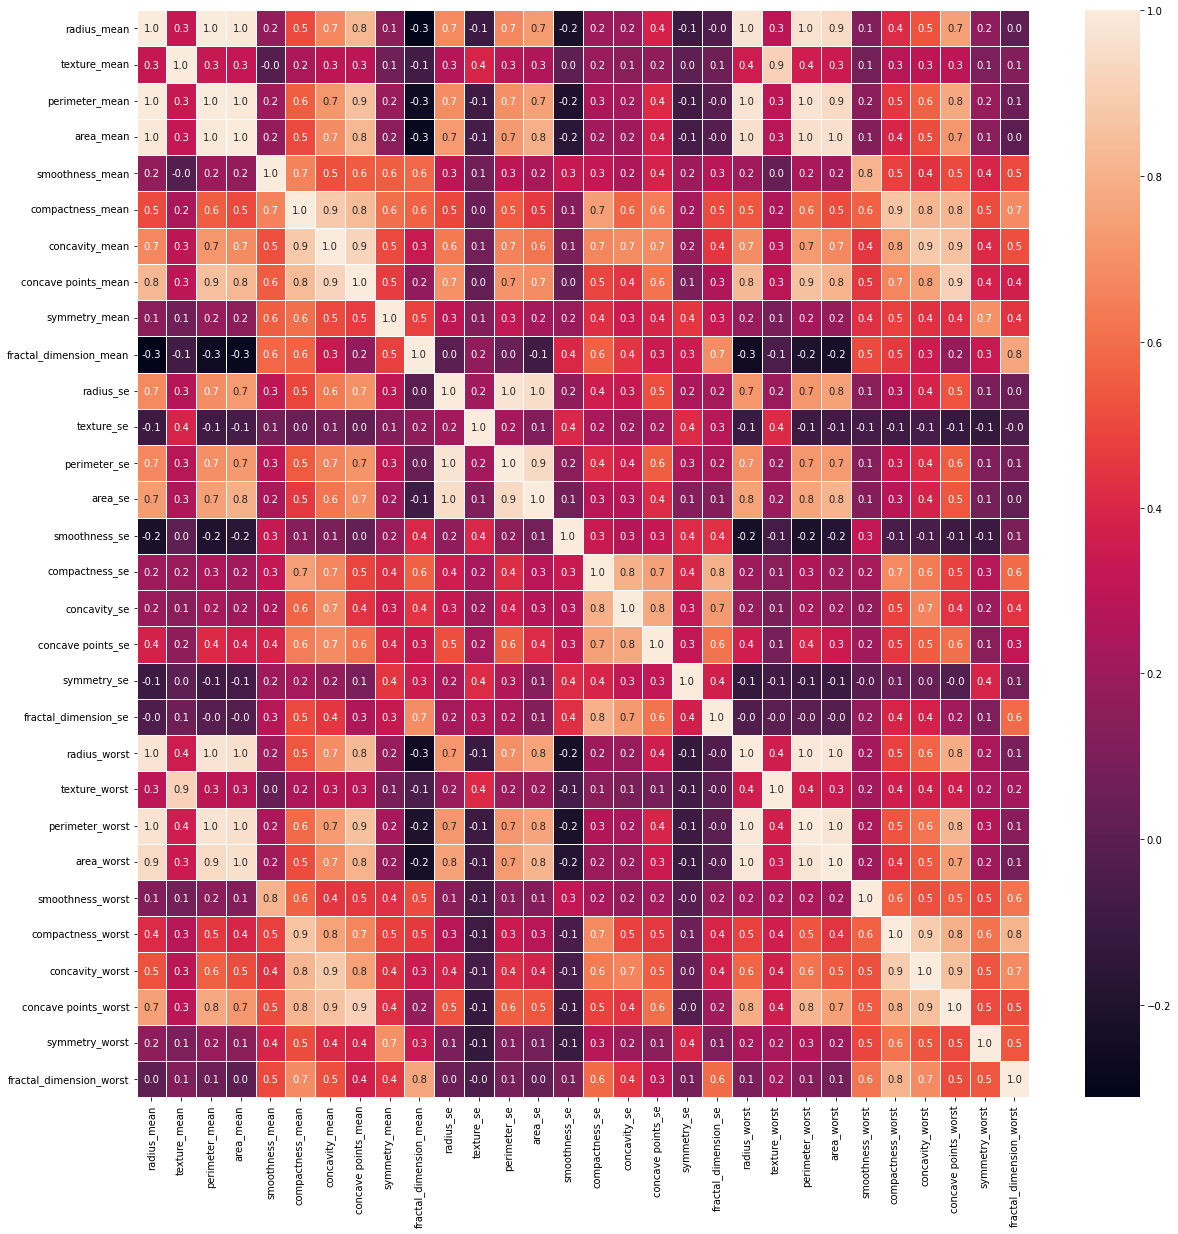

In [26]:
x = df_scaled
y = df['diagnosis']
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

### Implimentation of SVM

In [27]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Apply SVM Model

#### In scikit-learn, KFold is a class used for dividing the data into k consecutive folds or subsets to facilitate cross-validation.

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV


#data will be split into 4 folds during cross-validation
kfold=KFold(n_splits=4, shuffle=True, random_state=0)
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Best model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Best model accuracy : 0.974


### Confusion Matrix

It furnishes a breakdown of the predicted and observed labels, displaying counts for true positives, true negatives, false positives, and false negatives. The actual labels are represented in rows, while the predicted labels are represented in columns.

<AxesSubplot:>

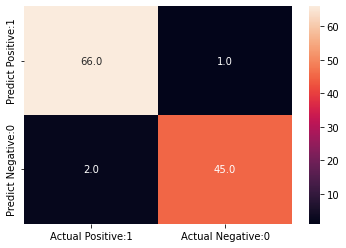

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.1f')

# SVM Kernel Functions

A kernel is a function used in SVM. With the help of kernel we can go to higher dimensions and perform smooth calculations. Kernel plays a vital role in classification and is used to analyze some patterns in the given dataset


#### Cross_val_score
The cross_val_score function performs cross-validation by splitting the data into n folds, training the model on n-1 folds, and evaluating it on the remaining fold. It returns an array of scores, representing the model's performance on each fold. We print the scores for each fold

#### classification model
classification model. It provides a summary of various evaluation metrics for each class in the dataset, including precision, recall, F1-score, and support.

### Apply SVM model using Linear Kernel function 

It is the most basic type of kernel, usually one dimensional in nature. It proves to be the best function when there are lots of features.

Linear kernel functions are faster than other functions.

F(x, xj) = sum( x.xj)

In [32]:
# calculate accuracy, classification report and cross validation
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
linear_scores = cross_val_score(linear_classifier, x, y, cv=kfold)
print(30*"--")
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
print(30*"--")
print(classification_report(y_test,y_pred))
print(30*"--")
print('Cross-validation with linear kernel:\n\n{}'.format(linear_scores))
print(30*"--")
print('Average Cross-validation with linear kernel:\n\n{}'.format(linear_scores.mean()))
print(30*"--")

------------------------------------------------------------
Model accuracy with linear kernel : 0.974
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

------------------------------------------------------------
Cross-validation with linear kernel:

[0.97202797 0.97887324 0.92957746 0.97887324]
------------------------------------------------------------
Average Cross-validation with linear kernel:

0.9648379789224859
------------------------------------------------------------


In [33]:
matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', matrix)

print('\nTrue Positives(TP) = ', matrix[0,0])

print('\nTrue Negatives(TN) = ', matrix[1,1])

print('\nFalse Positives(FP) = ', matrix[0,1])

print('\nFalse Negatives(FN) = ', matrix[1,0])

Confusion matrix

 [[66  1]
 [ 2 45]]

True Positives(TP) =  66

True Negatives(TN) =  45

False Positives(FP) =  1

False Negatives(FN) =  2


### Gaussian RBF kernel
The Gaussian RBF kernel calculates the similarity between two data points based on the Euclidean distance between them. It transforms the data into a higher-dimensional space where it becomes easier to find a hyperplane that separates the classes.
The kernel function takes the form:

K(x, x') = exp(-gamma * ||x - x'||^2)

In [34]:
 #calculating accuracy, classification report and cross validation
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
RBF_scores = cross_val_score(rbf_svc, x, y, cv=kfold)
print(30*"--")
print('Model accuracy with RBF kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
print(30*"--")
print(classification_report(y_test,y_pred))
print(30*"--")
print('Cross-validation with Gaussian RBF kernel:\n\n{}'.format(RBF_scores))
print(30*"--")
print('Average cross-validation with Gaussian RBF kernel:\n\n{}'.format(RBF_scores.mean()))
print(30*"--")

------------------------------------------------------------
Model accuracy with RBF kernel : 0.974
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

------------------------------------------------------------
Cross-validation with Gaussian RBF kernel:

[0.96503497 0.97887324 0.95070423 0.99295775]
------------------------------------------------------------
Average cross-validation with Gaussian RBF kernel:

0.9718925440756427
------------------------------------------------------------


In [35]:
matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', matrix)

print('\nTrue Positives(TP) = ', matrix[0,0])

print('\nTrue Negatives(TN) = ', matrix[1,1])

print('\nFalse Positives(FP) = ', matrix[0,1])

print('\nFalse Negatives(FN) = ', matrix[1,0])

Confusion matrix

 [[66  1]
 [ 2 45]]

True Positives(TP) =  66

True Negatives(TN) =  45

False Positives(FP) =  1

False Negatives(FN) =  2


### Polynomial kernel 

It is a more generalized representation of the linear kernel. It is not as preferred as other kernel functions as it is less efficient and accurate.


F(x, xj) = (x.xj+1)^d

In [36]:
 
Poly_svc=SVC(kernel='poly').fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
Poly_scores = cross_val_score(Poly_svc, x, y, cv=kfold)
print(30*"--")
print('Model accuracy with Polynomial kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
print(30*"--")
print(classification_report(y_test,y_pred))
print(30*"--")
print('Cross-validation with Polynomial kernel:\n\n{}'.format(Poly_scores))
print(30*"--")
print('Average cross-validation with Polynomial kernel:\n\n{}'.format(Poly_scores.mean()))
print(30*"--")

------------------------------------------------------------
Model accuracy with Polynomial kernel : 0.904
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        67
           1       1.00      0.77      0.87        47

    accuracy                           0.90       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.90      0.90       114

------------------------------------------------------------
Cross-validation with Polynomial kernel:

[0.91608392 0.9084507  0.88732394 0.8943662 ]
------------------------------------------------------------
Average cross-validation with Polynomial kernel:

0.9015561902885847
------------------------------------------------------------


In [37]:
matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', matrix)

print('\nTrue Positives(TP) = ', matrix[0,0])

print('\nTrue Negatives(TN) = ', matrix[1,1])

print('\nFalse Positives(FP) = ', matrix[0,1])

print('\nFalse Negatives(FN) = ', matrix[1,0])

Confusion matrix

 [[67  0]
 [11 36]]

True Positives(TP) =  67

True Negatives(TN) =  36

False Positives(FP) =  0

False Negatives(FN) =  11


### Sigmoid Kernel
It is mostly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.


F(x, xj) = tanh(αxay + c)

In [39]:
# SVM model using sigmoid kernel function 
sigmoid_svc=SVC(kernel='sigmoid',C = 1).fit(x_train,y_train)
y_pred = sigmoid_svc.predict(x_test)
Sigmoid_scores = cross_val_score(sigmoid_svc, x, y, cv=kfold)
print(30*"--")
print('Model accuracy with sigmoid kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
print(30*"--")
print(classification_report(y_test,y_pred))
print(30*"--")
print('Cross-validation with sigmoid kernel:\n\n{}'.format(Sigmoid_scores))
print(30*"--")
print('Average cross-validation with sigmoid kernel:\n\n{}'.format(Sigmoid_scores.mean()))
print(30*"--")

------------------------------------------------------------
Model accuracy with sigmoid kernel : 0.930
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

------------------------------------------------------------
Cross-validation with sigmoid kernel:

[0.97202797 0.93661972 0.95774648 0.95774648]
------------------------------------------------------------
Average cross-validation with sigmoid kernel:

0.9560351620210775
------------------------------------------------------------


In [40]:
matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', matrix)

print('\nTrue Positives(TP) = ', matrix[0,0])

print('\nTrue Negatives(TN) = ', matrix[1,1])

print('\nFalse Positives(FP) = ', matrix[0,1])

print('\nFalse Negatives(FN) = ', matrix[1,0])

Confusion matrix

 [[62  5]
 [ 3 44]]

True Positives(TP) =  62

True Negatives(TN) =  44

False Positives(FP) =  5

False Negatives(FN) =  3


Out of the kernels discussed earlier, both the Linear and Gaussian RBF kernels demonstrate the highest and equal accuracy in predictions. The model's accuracy using these two kernels stands at 0.974. The number of accurate predictions combines to 66 plus 45, resulting in a mean cross-validation accuracy of (66+45)/114 = 97.36%, which aligns with the approximate value obtained earlier. While the poly kernel exhibited no false positives compared to other kernels, its false negative count was the highest at 11.

### GridSearchCV

The GridSearchCV class in scikit-learn is used for performing an exhaustive search over specified parameter values for an estimator. It helps in finding the best combination of hyperparameters for a given model by evaluating the model's performance on a specified evaluation metric using cross-validation.
Overall, GridSearchCV is a powerful tool for automating the hyperparameter tuning process and finding the best combination of hyperparameters for a given model. It helps in optimizing the model's performance and can save significant time and effort in the model development process.

In [41]:
parameters = [ {'C':[1, 10, 50], 'kernel':['linear']},
               {'C':[1, 10, 50], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.5, 0.9]},
                {'C': [1, 10, 50], 'kernel': ['poly'], 'degree': [2, 3, 4]},
                {'C': [1, 10, 50], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.5, 0.9]}
              ]
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 10, 50], 'gamma': [0.1, 0.2, 0.5, 0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 50], 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [1, 10, 50], 'gamma': [0.1, 0.2, 0.5, 0.9],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

In [42]:
print('GridSearch CV best: {:.4f}\n'.format(grid_search.best_score_))
print('Best results :', (grid_search.best_params_))

GridSearch CV best: 0.9692

Best results : {'C': 1, 'kernel': 'linear'}


The GridSearchCV yielded the optimal accuracy score of 0.09692, with the Linear kernel identified as the best performing option.






### LogisticRegression

In this case, a dataset with 569 samples can be considered relatively small. Therefore, can use the 'liblinear' solver for logistic regression, which is suitable for small datasets. The 'liblinear' solver is efficient and supports both 'l1' and 'l2' penalties.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression

# Define a list of hyperparameter configurations to try
hyperparameters = [
    {'penalty': 'l2', 'C': 0.1},
    {'penalty': 'l1', 'C': 1},
    
]

# Initialize variables to store the best model and its evaluation scores
best_model = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1 = 0.0
best_auc_roc = 0.0

# Iterate over each hyperparameter configuration
for hyperparams in hyperparameters:
    # Create an instance of LogisticRegression with the given hyperparameters
    model = LogisticRegression(solver='liblinear', **hyperparams)

    # Train the model on the training data
    model.fit(x_train, y_train)

    # Predict the labels for the test data
    y_pred = model.predict(x_test)

    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    # Check if the current model outperforms the previous best model
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1 = f1
        best_auc_roc = auc_roc

# Print the evaluation scores for the best model
print("Best Model Evaluation:")
print("Accuracy:", best_accuracy)
print("Precision:", best_precision)
print("Recall:", best_recall)
print("F1 Score:", best_f1)
print("AUC-ROC Score:", best_auc_roc)
print("The best model based on the evaluation metrics is the one with the following hyperparameters:")
print(best_model.get_params())

Best Model Evaluation:
Accuracy: 0.9649122807017544
Precision: 0.9777777777777777
Recall: 0.9361702127659575
F1 Score: 0.9565217391304347
AUC-ROC Score: 0.9606224198158145
The best model based on the evaluation metrics is the one with the following hyperparameters:
{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### Interpretation of the evaluation


The assessment metrics reflect how well the top-performing model performs on the test dataset:

Accuracy - Gauges the overall correctness of predictions,
Precision - Demonstrates the model's capacity to accurately categorize positive cases,
Recall - Assesses the model's aptitude to identify all positive instances.
F1 Score - Represents the combined precision and recall in a balanced measure,
AUC-ROC Score - Evaluates the model's capacity to rank instances, particularly crucial in datasets with imbalances.